# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [232]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint
import datetime as dt

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# # Output File (CSV)
# output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [196]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



651

In [197]:
cities


['hilo',
 'esperance',
 'cidreira',
 'busselton',
 'bluff',
 'roma',
 'rikitea',
 'nabinagar',
 'punta arenas',
 'bengkulu',
 'taolanaro',
 'magnolia',
 'isiro',
 'richards bay',
 'qaanaaq',
 'albany',
 'puerto ayora',
 'fujin',
 'azimur',
 'oussouye',
 'gat',
 'hermanus',
 'fukue',
 'saleaula',
 'pochutla',
 'iisalmi',
 'souillac',
 'hobyo',
 'jaipur hat',
 'man',
 'samalaeulu',
 'mataura',
 'sarandi',
 'port macquarie',
 'tiksi',
 'coihaique',
 'banes',
 'comodoro rivadavia',
 'barrow',
 'mahebourg',
 'batagay',
 'kaitangata',
 'kapoeta',
 'lompoc',
 'isangel',
 'belmonte',
 'kodiak',
 'vaini',
 'tuktoyaktuk',
 'port alfred',
 'okhotsk',
 'cape town',
 'ushuaia',
 'deputatskiy',
 'hihifo',
 'atuona',
 'tessalit',
 'nikolskoye',
 'kavieng',
 'aykhal',
 'dikson',
 'quatre cocos',
 'nanortalik',
 'tasiilaq',
 'lorengau',
 'barentsburg',
 'qeshm',
 'chekhov',
 'attawapiskat',
 'jodhpur',
 'hithadhoo',
 'manaure',
 'palmer',
 'nizhneyansk',
 'henties bay',
 'aflu',
 'artyk',
 'harper',
 '

In [18]:
# # Save config information and build URL for one city
# url = "http://api.openweathermap.org/data/2.5/weather?"
# city = "longyearbyen"
# units = "imperial"

# # Build query URL
# query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"

# print(query_url)

# # print(weather_api_key)

http://api.openweathermap.org/data/2.5/weather?appid=75655c85820b20d2970fea69dab970e5&units=imperial&q=longyearbyen


In [20]:
# # Get weather data for one city
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# print(weather_json)

{'coord': {'lon': 15.6401, 'lat': 78.2186}, 'weather': [{'id': 800, 'main': 'Clear', 'description': 'clear sky', 'icon': '01n'}], 'base': 'stations', 'main': {'temp': 31.84, 'feels_like': 22.8, 'temp_min': 31.84, 'temp_max': 31.84, 'pressure': 1012, 'humidity': 80}, 'visibility': 10000, 'wind': {'speed': 11.5, 'deg': 110}, 'clouds': {'all': 0}, 'dt': 1631400200, 'sys': {'type': 1, 'id': 1663, 'country': 'SJ', 'sunrise': 1631416528, 'sunset': 1631471536}, 'timezone': 7200, 'id': 2729907, 'name': 'Longyearbyen', 'cod': 200}


In [21]:
# # pretty print the result to capture needed values for api call saves
# print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 0
    },
    "cod": 200,
    "coord": {
        "lat": 78.2186,
        "lon": 15.6401
    },
    "dt": 1631400200,
    "id": 2729907,
    "main": {
        "feels_like": 22.8,
        "humidity": 80,
        "pressure": 1012,
        "temp": 31.84,
        "temp_max": 31.84,
        "temp_min": 31.84
    },
    "name": "Longyearbyen",
    "sys": {
        "country": "SJ",
        "id": 1663,
        "sunrise": 1631416528,
        "sunset": 1631471536,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 10000,
    "weather": [
        {
            "description": "clear sky",
            "icon": "01n",
            "id": 800,
            "main": "Clear"
        }
    ],
    "wind": {
        "deg": 110,
        "speed": 11.5
    }
}


In [22]:
# # City, Lat, Lng, max temp, Humidity, Cloudiness,	Wind Speed,	Country	Date,
# # capture first recoreds to a DF


# city = weather_json["name"]
# lat = weather_json["coord"]["lat"]
# lon = weather_json["coord"]["lon"]
# maxtemp = weather_json["main"]["temp_max"]
# humidity = weather_json["main"]["humidity"]
# cloudiness = weather_json["clouds"]["all"]
# windspeed = weather_json["wind"]["speed"]
# date = datetime.datetime.fromtimestamp(weather_json["dt"]).strftime('%Y-%m-%d')
# print(city)
# print(lat)
# print(lon)
# print(maxtemp)
# print(humidity)
# print(cloudiness)
# print(windspeed)
# print(date)

Longyearbyen
78.2186
15.6401
31.84
80
0
11.5
2021-09-11


In [198]:
# for all cities in the cities set up list to hold each of the values
cityname = []
lat = []
lon = []
maxtemp = []
humidity = []
cloudiness = []
windspeed = []
country = []
date = []
# smallcities = ['longyearbyen',
#  'andros town',
#  'bredasdorp',
#  'isangel']


In [199]:

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()


# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="
counter = 1


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [200]:

# loop through the list of cities and perform a request for data on each
print('Beginning Data Retrieval')
for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        cityname.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lon.append(weather_response['coord']['lon'])
        maxtemp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        windspeed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(datetime.datetime.fromtimestamp(weather_response['dt']).strftime('%Y-%m-%d'))
        print(f'City Record - {counter} for {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')
        

print('Data Retrieval Complete')


Beginning Data Retrieval
City Record - 1 for hilo
City Record - 2 for esperance
City Record - 3 for cidreira
City Record - 4 for busselton
City Record - 5 for bluff
City Record - 6 for roma
City Record - 7 for rikitea
City Record - 8 for nabinagar
City Record - 9 for punta arenas
City Record - 10 for bengkulu
City Not Found
City Record - 11 for magnolia
City Record - 12 for isiro
City Record - 13 for richards bay
City Record - 14 for qaanaaq
City Record - 15 for albany
City Record - 16 for puerto ayora
City Record - 17 for fujin
City Not Found
City Record - 18 for oussouye
City Record - 19 for gat
City Record - 20 for hermanus
City Record - 21 for fukue
City Not Found
City Record - 22 for pochutla
City Record - 23 for iisalmi
City Record - 24 for souillac
City Record - 25 for hobyo
City Not Found
City Record - 26 for man
City Not Found
City Record - 27 for mataura
City Record - 28 for sarandi
City Record - 29 for port macquarie
City Record - 30 for tiksi
City Record - 31 for coihaique


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [202]:
# Convert Data in to a DataFrame
ct_df = pd.DataFrame({
    'City': cityname,
    'Latitude': lat,
    'Longitude': lon,
    'Tempature': maxtemp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Windspeed': windspeed,
    'Country': country,
    'Date of Weather': date
})

# export data to .csv
ct_df.to_csv(r"cities.csv")

In [203]:
# display data frame
ct_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
0,Hilo,19.7297,-155.0900,70.11,92,8,4.00,US,2021-09-12
1,Esperance,-33.8667,121.9000,49.84,72,11,12.08,AU,2021-09-12
2,Cidreira,-30.1811,-50.2056,68.09,76,6,14.52,BR,2021-09-12
3,Busselton,-33.6500,115.3333,50.09,81,96,4.23,AU,2021-09-12
4,Bluff,-46.6000,168.3333,47.80,77,87,24.87,NZ,2021-09-12


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 
----
Student Note - There were not cities with humidity > 100; as such there will be no need to check indicies or remove the cities and create new DF



In [204]:
# sorting ct_df by humidity ascending=false to dertermine if any rows are greater than 100
hum_df = ct_df.sort_values('Humidity', ascending=False)
hum_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
216,Ambon City,-3.6954,128.1814,77.14,100,40,3.44,ID,2021-09-12
555,Luleå,65.5842,22.1547,50.07,100,90,3.44,SE,2021-09-12
167,Vestmannaeyjar,63.4427,-20.2734,52.79,100,90,26.46,IS,2021-09-12
83,Campbell River,50.0163,-125.2446,54.93,100,40,8.05,CA,2021-09-12
588,Inuvik,68.3499,-133.7218,47.41,100,90,8.05,CA,2021-09-12


In [52]:
#  Get the indices of cities that have humidity over 100%.


In [51]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [240]:
# capture today's date for plot titles
date = "09/12/2021"

# capturing data variables for plots
lat = ct_df['Latitude']
temp = ct_df['Tempature']
humidity = ct_df['Humidity']
cloudy = ct_df['Cloudiness']
windspeed = ct_df['Windspeed']

print(date)

09/12/2021


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Student Note - The plot seems to demonstrate that as latitudes move away from the equator tempatures also decrease or increase more.

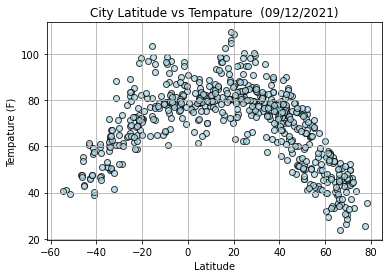

In [241]:
# create a scatter plot using lat and temp for the axis
plt.scatter(lat, temp, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Tempature  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Tempature (F)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-temp.png")
plt.show()

## Latitude vs. Humidity Plot

Student Note - There does not appear to be any correlation between latitude and humidity percengage;


Student Note - Within the dataset of cities selected, at the equator, there are no cities below 60% humidity; this could be researched or proven by looking at more cities with latitudes closer to the equator.

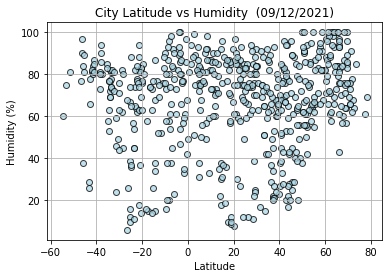

In [242]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, humidity, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Humidity  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-humid.png")
plt.show()

## Latitude vs. Cloudiness Plot

Student Note - While no obvious correlation is observed, it does appear that within the dataset of cities and when north of the equator, there are more citie closer or at 100% cloudiness and alos at or close to 0% cloudiness.

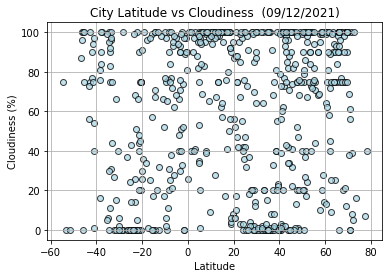

In [243]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, cloudy, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Cloudiness  ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-cloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

Student Note - There does not appear to be any visual corelation between latitude and windspeed in the data set of cities selected.

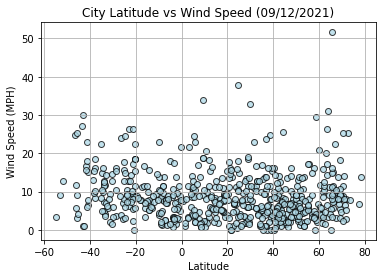

In [244]:
# create a scatter plot using lat and humidity for the axis
plt.scatter(lat, windspeed, marker="o", facecolors="lightblue", edgecolors="black",
             alpha=0.75)
plt.grid()
plt.title(f"City Latitude vs Wind Speed ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\lat-v-wdspeed.png")
plt.show()

## Linear Regression

In [245]:
# creating dataframes to hold the northern and southern hemisphere and confirmed there are no cities with 0 latidute
nhemi_df = ct_df[ct_df['Latitude'] >= 0]

shemi_df = ct_df[ct_df['Latitude'] <= 0]

# eq_df = ct_df[ct_df['Latitude'] == 0]

# eq_df.head()
shemi_df.head()

,City,Latitude,Longitude,Tempature,Humidity,Cloudiness,Windspeed,Country,Date of Weather
1,Esperance,-33.8667,121.9000,49.84,72,11,12.08,AU,2021-09-12
2,Cidreira,-30.1811,-50.2056,68.09,76,6,14.52,BR,2021-09-12
3,Busselton,-33.6500,115.3333,50.09,81,96,4.23,AU,2021-09-12
4,Bluff,-46.6000,168.3333,47.80,77,87,24.87,NZ,2021-09-12
6,Rikitea,-23.1203,-134.9692,72.97,74,26,6.13,PF,2021-09-12


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

Student Note - The regression plot of Northern Hemisphere tempatures compared to latitudes seems to indicate that as latitude increases or "further from the equator" the tempature decreases.  The R value would seem to indicate this is not fully correlated but is more corelated than not.


The r-squared is: 0.6135497915709507


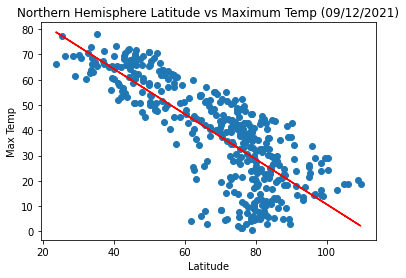

In [246]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Tempature']
y_values = nhemi_df['Latitude']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,11),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Maximum Temp ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north- lat-v-temp-regress.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Student Notes - When comparing the southern hemisphere to max temp regression, it generally appears that tempatures increase as you move closer to the equator; while not as strong as the regression in the northern hemisphere, the data set still presented an r value that is more correlated than not.

The r-squared is: 0.5951576712373138


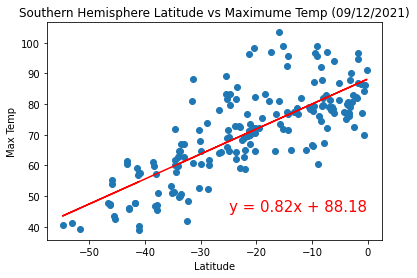

In [247]:
# adding the linear regression equation and line to plot for souther hemisphere latitudes and temaptures with equation and r score
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Tempature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-25,45),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Maximume Temp ({date})")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-temp-regress.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression
Student Note - In review of the regression plot for Northern Hemisphere Latitudes compared to Humidity, there does not appear to be a strong correlation.  This is supported by an R value close to 0.  

The r-squared is: 0.015413074138153425


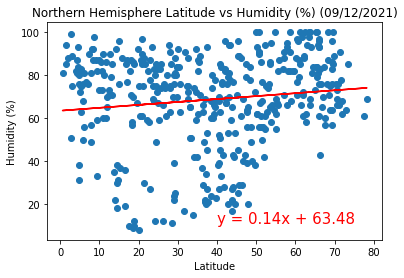

In [248]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,11),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Humidity (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-hum-regress.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Student Note - In review of the regression plot of Southern Hemisphere - Humiidty % vs Latitude, there is a slightly stronger correlation in the data set than in the Northern Hemisphere, but still not a strong correlation.

The r-squared is: 0.004587096919691171


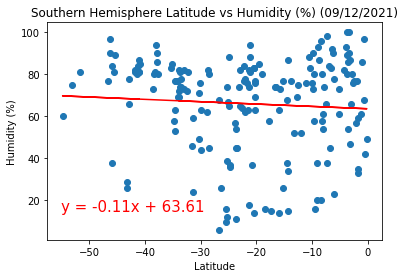

In [249]:
# adding the linear regression equation and line to plot for souther hemisphere latitudes and temaptures with equation and r score
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Humidity (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-hum-regress.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Student Note - The plot does not demonstrate a strong or observeable correlation visually.  Some concentrations of cities appear to exist in the data set at the upper and lower bounds of cloudienss percantages.  The R value also does not indicate a strong coorelation.

The r-squared is: 7.125047404939183e-05


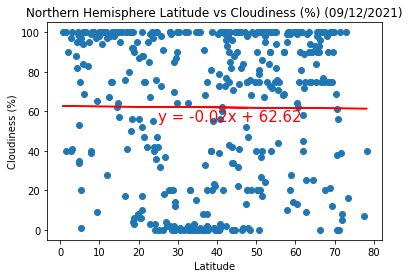

In [250]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,55),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Cloudiness (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-cloud-regress.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Student Note - Akin to the northern hemisphere regression of cloudieness and latitude, there is not a strong visual correlation and the r score also appears to support this.

The r-squared is: 0.003526180431025164


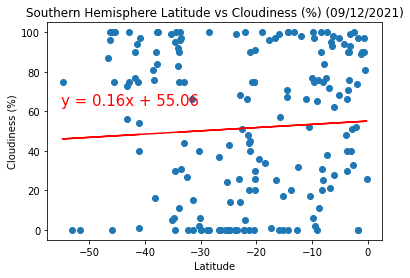

In [251]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,63),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Cloudiness (%) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-cloud-regress.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Student Note - IN review of the regression plot and the r score, there is not a strong or observeable correlation between wind speed and latitude in the Northern Hemisphere.

The r-squared is: 0.0009100065493375439


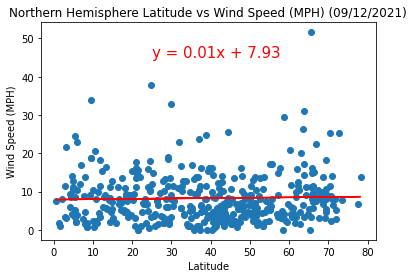

In [252]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = nhemi_df['Latitude']
y_values = nhemi_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,45),fontsize=15,color="red")
plt.title(f"Northern Hemisphere Latitude vs Wind Speed (MPH) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\north-lat-v-wind-regress.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Student Note - Again akin to the northern hemisphere regression plot, there is not an observeable correlation and this is also supported by the r score.  The dataset for the southern hemisphere does appear to be slightly more correlated than the northern hemisphere.

The r-squared is: 0.07022525479302652


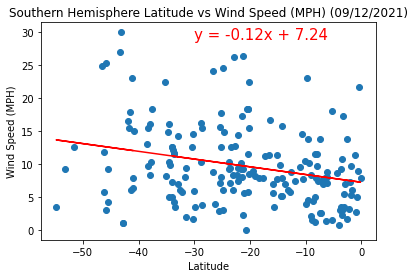

In [253]:
# adding the linear regression equation and line to plot
# Add the linear regression equation and line to plot
x_values = shemi_df['Latitude']
y_values = shemi_df['Windspeed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,29),fontsize=15,color="red")
plt.title(f"Southern Hemisphere Latitude vs Wind Speed (MPH) ({date})")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (MPH)')
print(f"The r-squared is: {rvalue**2}")
plt.savefig(r"C:\Users\benjy\Documents\Bootcamp Repos\python-api-challenge\output_data\south-lat-v-wind-regress.png")
plt.show()